In [ ]:
using Pkg, Revise
Pkg.activate("..")
using ISOKANN, Plots
Plots.default(fmt=:png)

In [ ]:
# we start by loading the .pdb file into a ::Molly.System
sys = PDB_ACEMD()

In [ ]:
# and plug it into a ::MollyLangevin which specifies a simulation (integrator, timesteps, length)
sim = MollyLangevin(;sys)

In [ ]:
# solving the simulation returns a matrix with the atoms positions in each column
traj = solve(sim);

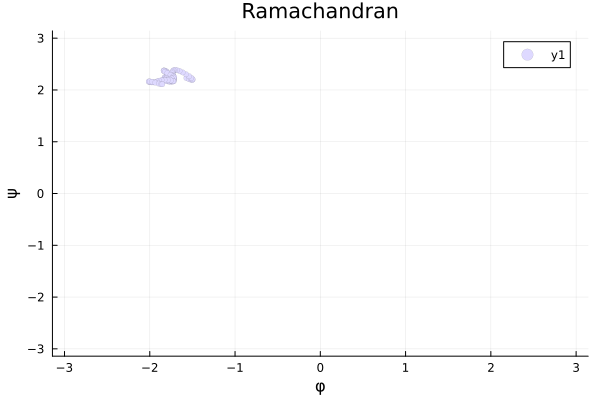

In [28]:
# the dihedral angles depicted in the ramachandran plot offer a good visualization of the state of the molecule
scatter_ramachandran(traj, fmt=:png)

In [ ]:
# alternatively we can export the trajectory into a .pdb file and look at it with any viewer

In [ ]:
trajs = Dict()

In [ ]:
# ~Stationary Distributions for 1ns 

for gamma in [1., 10., 100.] 
    t = get!(trajs, gamma) do 
        solve(MollyLangevin(;sys, gamma, dt=2e-3, T=1e3)) 
    end
    scatter_ramachandran(t, markersize=1, alpha=0.3)
    plot!(title = "γ = $gamma", fmt = :png) |> display
end

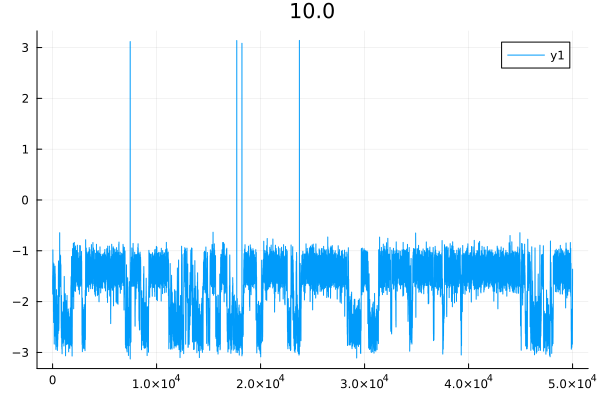

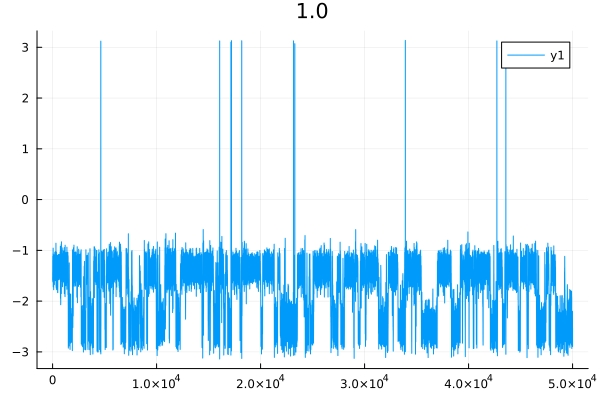

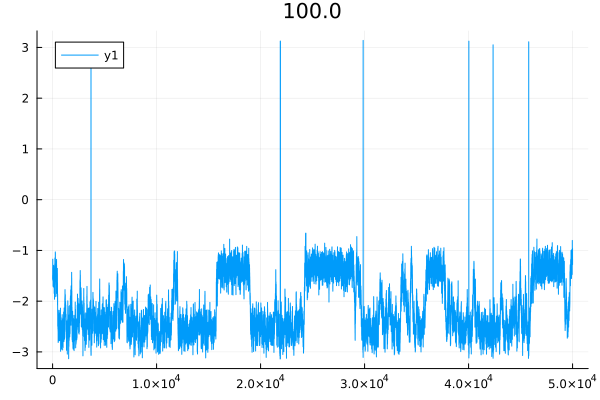

In [32]:
# number of conformation changes

for (gamma, traj) in trajs
    plot(ISOKANN.phi(traj[:,1:10:end]), fmt=:png, title="$gamma") |> display
end

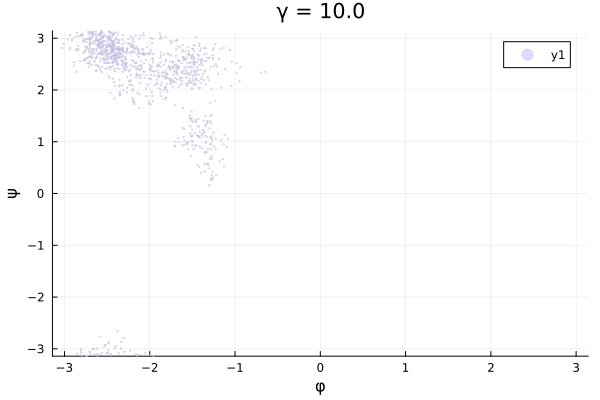

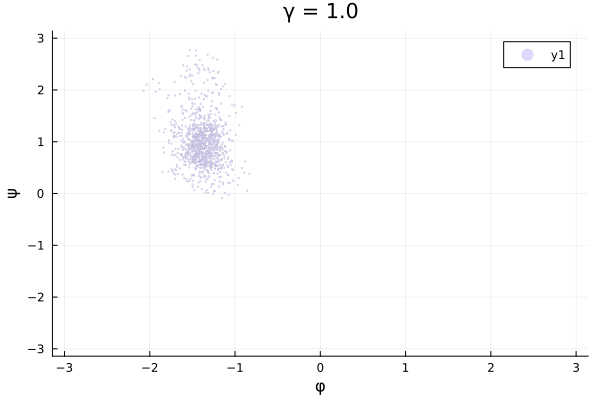

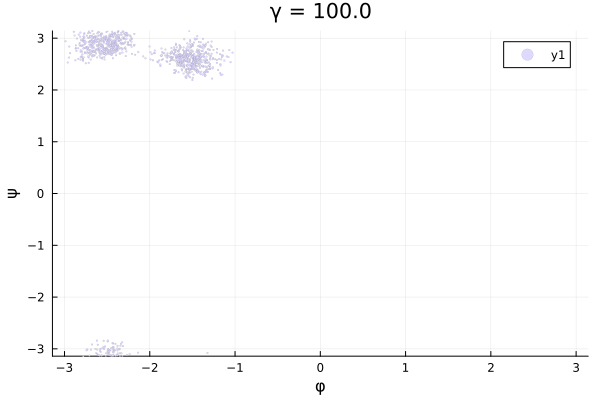

In [33]:
# mobility wrt to the traj length
for (gamma, traj) in trajs
    scatter_ramachandran(traj[:,1:10:10*1000], markersize=1)
    plot!(title = "γ = $gamma", fmt=:png) |> display
end